# Excercise 2

## Import packages

In [1]:
import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt

import skimage.io
import skimage.color
import skimage.exposure

import time
import math
import random

## Task 1
(2 points)
1. Use $f = loss(100)$ which creates a 1D array that mimics a loss curve of some neural network.
2. Implement the naive $\mathcal{O}(n w)$ mean filter to smooth the loss.
3. Implement the improved $\mathcal{O}(n)$ mean filter to smooth the loss.
4. Show all three curves in a single plot with a legend.
5. Compare the runtime between the naive and improved implementation.

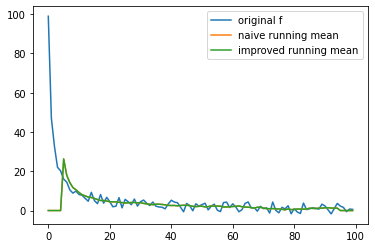

Measuring running time for 1000000 data points
Running time of naive running mean: 2.631263017654419
Running time of impoved running mean: 0.9384360313415527


In [2]:
# 1.
def loss(n):    
    return 1.0 / (0.01 * (np.arange(0, n) + 1)) + 3.0 * np.random.uniform(-1.00, 1.00, n)

# TODO: generate f with loss helper function
f = loss(100)

# 2.
def naive_running_mean(f, w):
    '''
    Apply the naive running mean filter and return the smoothed values.

    f -- contains the values
    w -- window size
    '''
    g = np.zeros(f.shape)
    
    for x in range(w, len(f) - w):
        sum = 0
        for xp in range(x-w, x+w+1):
            sum += f[xp]
        
        g[x] = sum / (2 * w + 1)
    
    return g

# 3.
def improved_running_mean(f, w):
    '''
    Apply the improved running mean filter and return the smoothed values.

    f -- contains the values
    w -- window size
    '''
    f_summed = np.zeros(f.shape)
    f_summed[0] = f[0]
    for i in range(1, len(f)):
        f_summed[i] = f_summed[i-1] + f[i]
        
    g = np.zeros(f.shape)
    g[w] = f_summed[2*w] / (2 * w + 1)
    for x in range(w + 1, len(f) - w):
        g[x] = (f_summed[x+w] - f_summed[x-w-1]) / (2 * w + 1)
    return g

# 4.
ws = 5

# TODO: Plot all three curves in a single plot
g_naive = naive_running_mean(f, ws)
g_improved = improved_running_mean(f, ws)

plt.plot(f, label="original f")
plt.plot(g_naive, label="naive running mean")
plt.plot(g_improved, label = "improved running mean")
plt.legend()
plt.show()

# 5.

n = 1000000
f = loss(n)

# TODO: Measure and print the runtime of both methods in Milliseconds

print("Measuring running time for " + str(n) + " data points")
start = time.time()
naive_running_mean(f, ws)
end = time.time()
print("Running time of naive running mean: " + str(end - start))

start = time.time()
improved_running_mean(f, ws)
end = time.time()
print("Running time of impoved running mean: " + str(end - start))


## Task 2
(4 points)
1. Create numpy arrays for the horizontal and vertical Sobel kernel.
$$
S_x =\begin{bmatrix}
-1 & -2 & -1 \\
0 & 0 & 0 \\
1 & 2 & 1
\end{bmatrix}
$$

$$
S_y =\begin{bmatrix}
-1 & 0 & 1 \\
-2 & 0 & 2 \\
-1 & 0 & 1
\end{bmatrix}
$$

2. Implement the $\textit{convolve}$ function with four nested loops.
3. Load the image from the last exercise and detect its edges using the Sobel kernels and the $\textit{convolve}$ function.
4. Implement the 1D $\textit{convolve_fast}$ function. Apply the seperated Sobel operators $u$ and $v$. Plot the result together with $\textit{convolve(S_x)}$ and compare the runtime.
5. Implement a function that seperates a 2D kernel into 2 1D kernels.
6. (Bonus) Use the function for a gaussian blur kernel and apply it on the image.

In [3]:
# 1
# TODO Create S_x and S_y
S_x = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
S_y = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

print('Horizontal Sobel kernel:\n', S_x)
print('Vertical Sobel kernel:\n', S_y)

Horizontal Sobel kernel:
 [[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]
Vertical Sobel kernel:
 [[-1  0  1]
 [-2  0  2]
 [-1  0  1]]


In [4]:
# 2
def convolve(arr, ker):
    '''
    Convolve the array using kernel K with four nested for loops.
    
    arr -- 2D array that gets convolved
    ker   -- kernel
    '''
    w = math.floor(ker.shape[0] / 2)
    arr_conv = np.zeros(arr.shape)
    
    for x in range(w, arr.shape[0] - w):
        for y in range(w, arr.shape[1] - w):
            conv_sum  = 0
            
            for x_ker in range(-w, w + 1):
                for y_ker in range(-w, w + 1):
                    conv_sum += arr[x + x_ker, y + y_ker] * ker[x_ker + w, y_ker + w]
                    
            arr_conv[x, y] = conv_sum
    
    return arr_conv

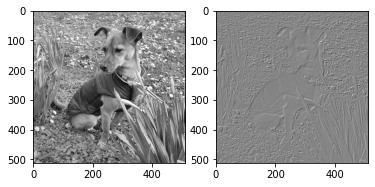

In [5]:
# 3
# TODO: load ./data/pepo.jpg as a grayscale image
image = skimage.io.imread("./data/pepo.jpg")
image = skimage.color.rgb2gray(image)

# TODO: Use the Sobel filter for edge detection:
#       Compute the Gradient Magnitude using both Sobel kernels
edges_x = convolve(image, S_x)
edges_y = convolve(image, S_y)
edges = edges_x + edges_y

# Show results
_, axis = plt.subplots(1, 2)
axis[0].imshow(image, cmap='gray')
axis[1].imshow(edges, cmap='gray')
plt.show()

u   =
 [[1]
 [2]
 [1]]
v   =
 [[-1  0  1]]
S_x =
 [[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]
Time naive: 1.5219571590423584
Time improved: 1.1786670684814453


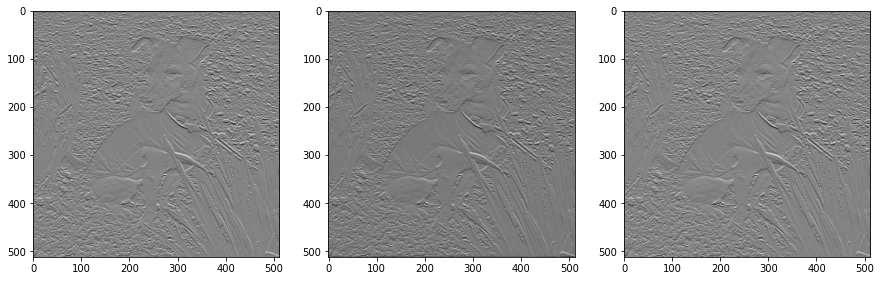

False


In [58]:
# 4
u = np.array([[1], [2], [1]])
v = np.array([[-1, 0, 1]])
#S_x = np.dot(u, v)
print('u   =\n', u)
print('v   =\n', v)
print('S_x =\n', S_x)

def convolve_fast(arr, K_u, K_v):
    '''
    Convolve the array using kernel K_u and K_v.
    
    arr -- 2D array that gets convolved
    K_u -- kernel u
    K_v -- kernel v
    '''
    w = math.floor(K_u.shape[0] / 2)
    arr_conv = np.zeros(arr.shape)
           
    for x in range(w, arr.shape[0] - w):
        for y in range(w, arr.shape[1] - w):
            conv_sum = 0
            
            for y_ker in range(-w, w + 1):
                conv_sum += arr[x, y + y_ker] * K_u[y_ker + w][0]
                
            arr_conv[x, y] = conv_sum

    arr = arr_conv
    arr_conv = np.zeros(arr.shape)
    
    for y in range(w, arr.shape[1] - w):
        for x in range(w, arr.shape[0] - w): 
            conv_sum = 0
            
            for x_ker in range(-w, w + 1):
                conv_sum += arr[x + x_ker, y] * K_v[0][x_ker + w]
                
            arr_conv[x, y] = conv_sum
            
    return arr_conv

# TODO: Run both methods and compare their runtime
start_naive = time.time()
edges_naive = convolve(image, S_x)
end_naive = time.time()

start_improved = time.time()
edges_improved = convolve_fast(image, u, v)
end_improved = time.time()

print("Time naive: " + str(end_naive - start_naive))
print("Time improved: " + str(end_improved - start_improved))

from scipy import ndimage, misc
result = ndimage.sobel(image, axis=0)

# Show results
f, axis = plt.subplots(1, 3)
f.set_figheight(15)
f.set_figwidth(15)
axis[0].imshow(edges_naive, cmap='gray')
axis[1].imshow(edges_improved, cmap='gray')
axis[2].imshow(result, cmap='gray')
plt.show()

result[0] = 0
result[-1] = 0
result[:,0] = 0
result[:,-1] = 0
print(np.allclose(edges_improved, result))

In [33]:
# 5
from scipy.linalg import svd
print('rank of s_x:', np.linalg.matrix_rank(S_x))
print('rank of s_y:', np.linalg.matrix_rank(S_y))

def separate(K):
    '''
    Seperate the 2D kernel into 2 1D kernels.
    
    K -- 2D kernel
    '''
    U, s, VT = svd(K)
    U *= -1
    VT *= -1

    K_u = np.array([U[:,0] * s[0]]).T
    K_v = np.array([VT[0]])
    return K_u, K_v

K_u, K_v = separate(S_x)
print('K_u =\n', K_u)
print('K_v =\n', K_v)
print('K   =\n', np.dot(K_u, K_v))

rank of s_x: 1
rank of s_y: 1
K_u =
 [[ 2.44948974]
 [-0.        ]
 [-2.44948974]]
K_v =
 [[-0.40824829 -0.81649658 -0.40824829]]
K   =
 [[-1. -2. -1.]
 [ 0.  0.  0.]
 [ 1.  2.  1.]]


7.5
Time naive: 24.85050106048584
Time improved: 3.7887420654296875


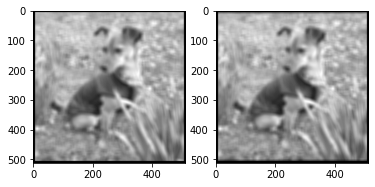

In [57]:
# 6 Bonus
from scipy import signal
def gaussian_kernel(kernel_size, sigma):
    '''
    Return a 2D gaussian kernel.
    
    kernel_size -- size of the kernel
    sigma       -- sigma of the gaussian blur
    '''
    kernel_1d = signal.gaussian(kernel_size, std=sigma).reshape(kernel_size, 1)
    h = np.outer(kernel_1d, kernel_1d)
    return h

K = gaussian_kernel(15, 15)

K_u, K_v = separate(K)

# TODO: Run both methods and compare their runtime
start_naive = time.time()
conv_x_naive = convolve(image, K)
end_naive = time.time()

start_improved = time.time()
conv_x_improved = convolve_fast(image, K_u, K_v)
end_improved = time.time()

print("Time naive: " + str(end_naive - start_naive))
print("Time improved: " + str(end_improved - start_improved))

# Plot the results
_, axis = plt.subplots(1, 2)
axis[0].imshow(conv_x_naive, cmap='gray')
axis[1].imshow(conv_x_improved, cmap='gray')
plt.show()

## Task 3
(4 points)

1. Implement the naive max function using nested loops.
2. Implement the $\mathcal{O}(n log w)$ faster max function using a binary tree.

In [ ]:
#1
def naive_max(arr, ws):
    '''
    Return the maximum-filtered array
    
    arr -- 2D array
    ws -- window size
    '''
    
    return g

# Generate some random data to filter
f = []
for i in range(25):
    f.append(random.randint(0, 100))

print('input = ', f)
print('naive_max =', naive_max(f, 3))

input =  [30, 24, 8, 65, 0, 50, 2, 56, 46, 92, 28, 94, 48, 15, 39, 55, 12, 91, 7, 91, 73, 66, 73, 82, 6]


NameError: name 'g' is not defined

In [ ]:
#2
class Node:
    def __init__(self):
        self.max = -np.inf # value of this node
        self.top = None    # reference to parent node
        self.left = None   # left child node
        self.right = None  # right child node
        
        # HINT: this list will hold a reference to all leaf nodes that
        #       are children of this node.
        #       You will need later to add new and replace old values
        #       in the tree.
        self.elems = []    # list of all child leaf nodes
    
    
    def build_tree(self, depth, top=None):
        '''
        Build up a tree of certain depth
        
        depth -- tree depth
        top -- parent node
        '''
        self.top = top
        
        if depth > 0:
            # TODO: recursively initialize all children
           
            
            # TODO: concatenate elems lists of children
            # HINT: nodes that are not leafes should not be added
            #       to self.elems
            
        
        else:
            # TODO: this is a leaf node
            # HINT: this node has to be added to the elems list
            
        
        return self.elems
    
    
    def update(self):
        '''
        Update the value (self.max) of this node
        and its parent nodes recursively
        '''
        
        pass


class MaxTree:
    def __init__(self, ws):
        '''
        ws -- window size
        '''
        # TODO: compute number of leafes and tree depth (length = 2 * ws + 1)
        
        
        # TODO: initialize root node 
        
        
        # init pointer to next element to be replaced
        self.ptr = 0
        
    def replace_elem(self, value):
        '''
        Replace an element (value of leaf node) in the tree

        value -- value of new element
        '''
        # HINT: use self.ptr as a pointer to the next
        #       element that has to be replaced
        
        pass

    
    def get_max(self):
        return self.root.max

tree = MaxTree(3)

def fast_max(arr, ws):
    '''
    Return the maximum-filtered array
    
    arr -- 2D array
    ws -- window size
    '''
    max_arr = []
    
    # TODO: initialize tree
    
    
    # TODO: compute maximum-filtered output array
    
    
    return max_arr


print('input = ', f)
print('fast_max =', fast_max(f, 3))

We now use your implementation to filter an image with different window sizes.
Note, that for small windows, the naive method is indeed faster due to the lower overhead.
However, as it has a much better time complexity, the tree method is much faster for large windows.

In [ ]:
# Nothing to do here ;)
def image_max(arr, ws, method):
    '''
    Apply a max-filter to an image
    
    arr -- input image
    ws -- window size
    method -- filter function
    '''
    out = np.zeros_like(arr)
    
    for y in range(arr.shape[0]):
        out[y] = method(arr[y], ws)
    
    for x in range(arr.shape[1]):
        out[:, x] = method(out[:, x], ws)
    
    
    return out

for ws in [2, 4, 8, 16, 32]:
    print('\nFilter with window size {}'.format(ws))
    start_time = time.time()
    max_img_naive = image_max(image, ws, naive_max)
    naive_time = time.time() - start_time
    print('Naive implementation took {:.3f} ms'.format(1000 * naive_time))

    start_time = time.time()
    max_img_improved = image_max(image, ws, fast_max)
    improved_time = time.time() - start_time
    print('Improved implementation took {:.3f} ms'.format(1000 * improved_time))

    _, axis = plt.subplots(1, 2)
    axis[0].imshow(max_img_naive, cmap='gray')
    axis[1].imshow(max_img_improved,cmap='gray')
    plt.show()